In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [6]:
Walmart_sales = pd.read_csv("/content/drive/MyDrive/cse303/Walmart_sales (1).csv")

In [7]:
print('Walmart_sales:')
print(Walmart_sales.head())


Walmart_sales:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [8]:
df = pd.concat([Walmart_sales])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


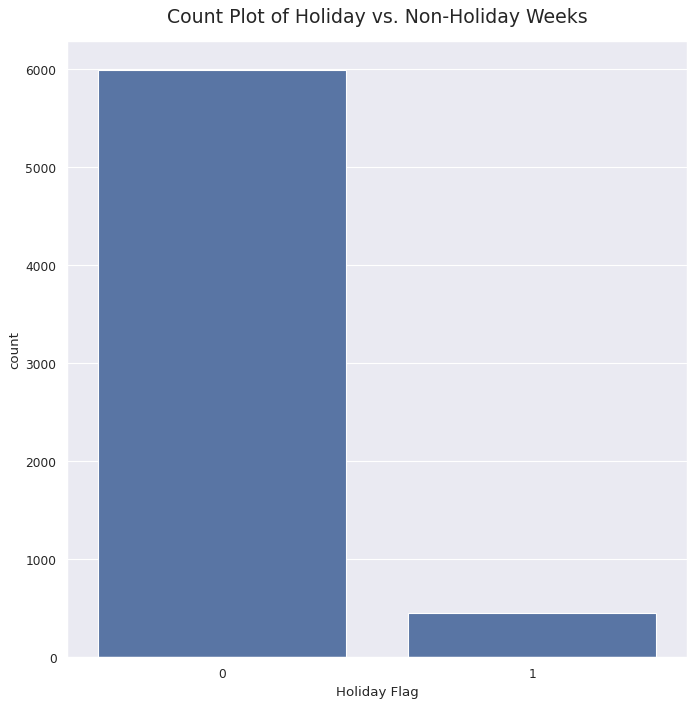

In [ ]:
#Count Plot of Holiday vs. Non-Holiday Weeks:
plt.figure(figsize=(10,10), dpi=80)
sns.countplot(x=df['Holiday_Flag'])
plt.xlabel('Holiday Flag')
plt.title("Count Plot of Holiday vs. Non-Holiday Weeks", size=17, pad= 17)
plt.show()

The count plot shows the number of weeks in the dataset that are holidays and non-holidays. The x-axis shows the holiday flag, which is 0 for non-holiday weeks and 1 for holiday weeks. The y-axis shows the count of weeks. The plot shows that there are 6000 non-holiday weeks and 400 holiday weeks in the dataset.

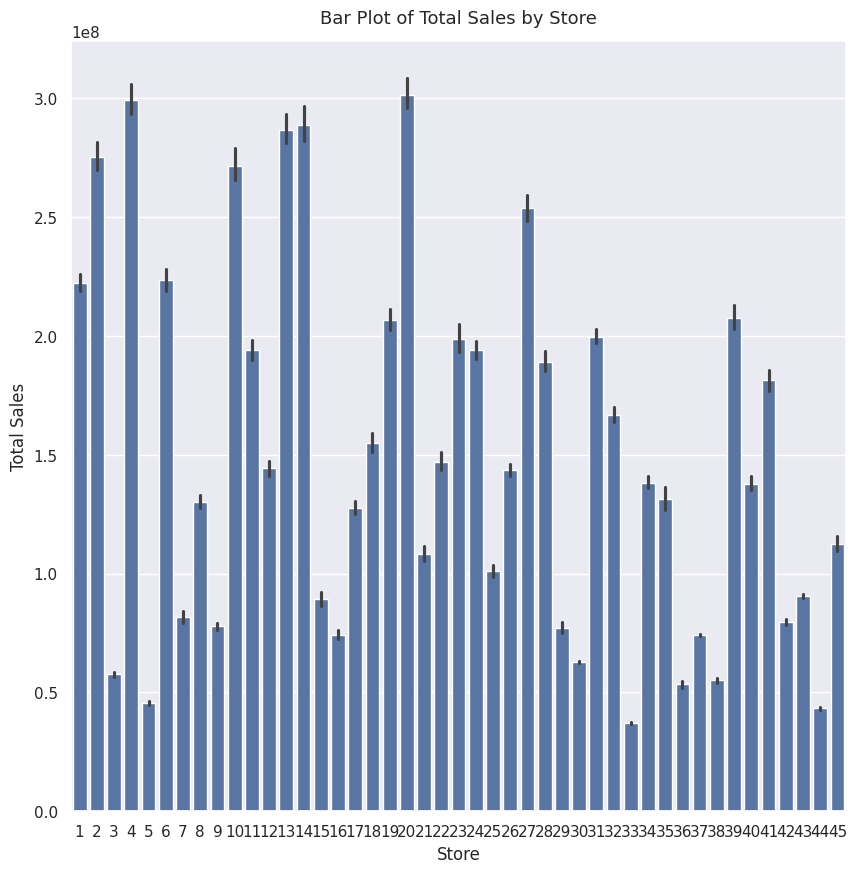

In [11]:
#Bar Plot of Total Sales by Store:
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(x="Store", y="Weekly_Sales", data=df, estimator=sum)
plt.title("Bar plot of total sales ", size=17, pad=13 )
plt.show()


The bar plot shows the total sales for each store, with error bars indicating the standard deviation of the sales. The x-axis shows the store number, and the y-axis shows the total sales in millions of dollars. The plot shows that store 20 had the highest sales, followed by store 1 and store 3. The sales for most stores are between 1 and 2 million dollars.

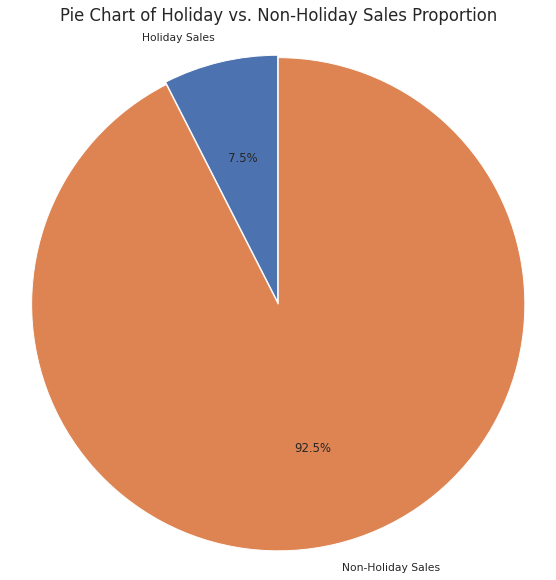

In [18]:
#Pie Chart of Holiday vs. Non-Holiday Sales Proportion:
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()
proportions = [holiday_sales, non_holiday_sales]

plt.figure(figsize = (10, 10), dpi = 70)
plt.pie(proportions, data = df, labels = ['Holiday Sales', 'Non-Holiday Sales'], explode = (0.01, 0), startangle = 90, autopct = '%1.1f%%', shadow = False)
plt.axis('equal')
plt.title("Pie Chart of Holiday vs. Non-Holiday Sales Proportion", size = 17, pad = 13)
plt.show()

The pie chart shows that the majority of sales, 92.5%, occurred during non-holiday periods, while only 7.5% of sales happened during holidays.
The "Holiday Sales" category is much smaller than the "Non-Holiday Sales"

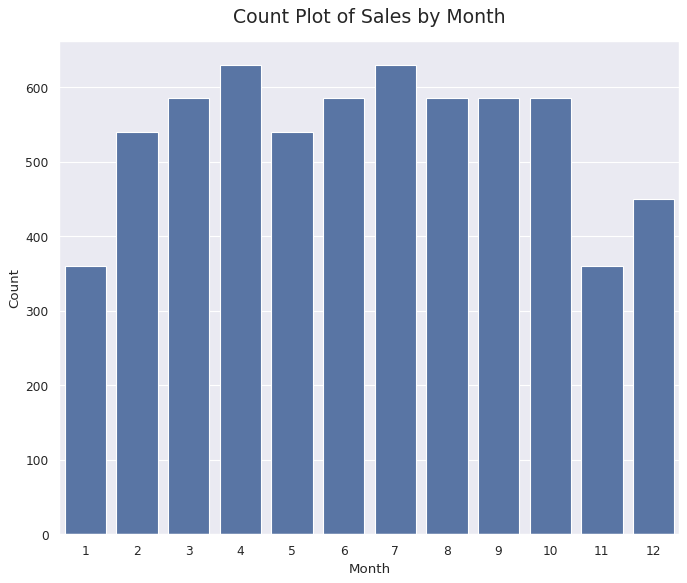

In [15]:
#Count Plot of Sales by Month:
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 8), dpi=80)
sns.countplot(x=df['Month'])
plt.title("Count Plot of Sales by Month", size=17, pad=17)
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

The count plot shows the number of sales made in each month of the year. The x-axis shows the month number 1 to 12, and the y-axis shows the number of sales. The plot shows that the most sales were made in April, followed by May and June. The fewest sales were made in November.

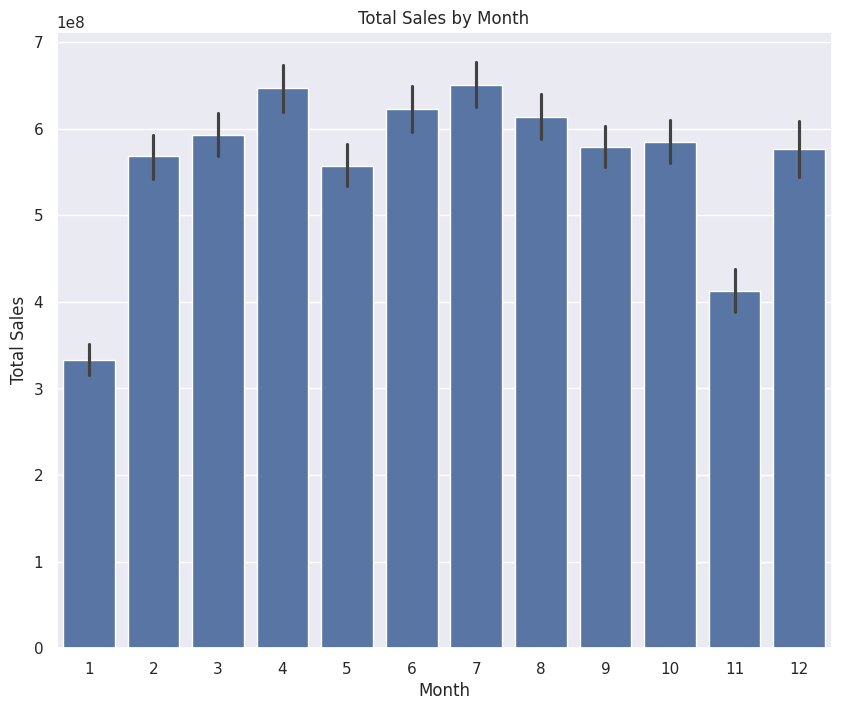

In [16]:
#Bar Plot of Total Sales by Month:
Month = pd.to_datetime(df['Date']).dt.month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="Month", y="Weekly_Sales", estimator='sum')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


The bar chart shows monthly sales performance.
It compares total sales for each month of the year. April had the highest sales, followed closely by May and June. Sales were lowest in January. There's a clear peak in sales during spring months and a decline towards the end of the year. The error bars indicate the variability in sales for each month.

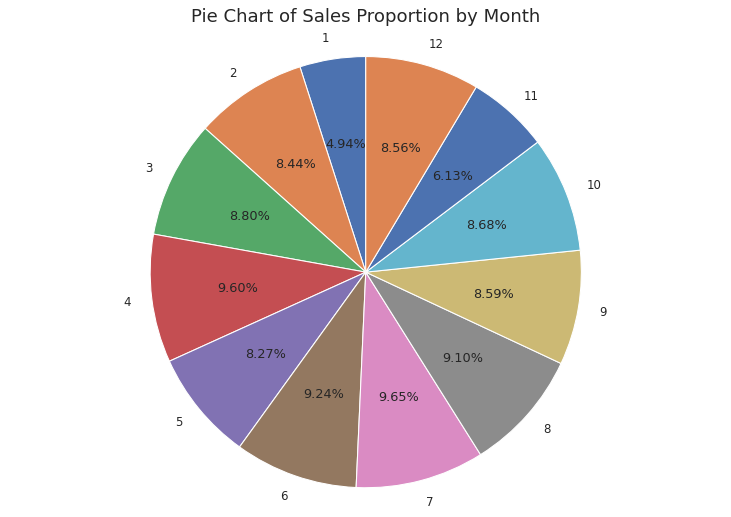

In [17]:
#Pie Chart of Sales Proportion by Month:
Month = pd.to_datetime(df['Date']).dt.month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

plt.figure(figsize=(12, 8), dpi=77)
plt.pie(monthly_sales, labels=monthly_sales.index, startangle=90, autopct='%2.2f%%', shadow=False)
plt.axis('equal')
plt.title("Pie Chart of Sales Proportion by Month", size=17, pad=13)
plt.show()


The pie chart shows the proportion of sales by month. The numbers 1-12 represent the 12 months of the year. The size of each slice of the pie chart represents the percentage of sales for that month. The pie chart shows that sales are highest in month 4 and lowest in month 1. The percentages of sales for the other months are relatively close together.

<ipython-input-17-df693880e667>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()


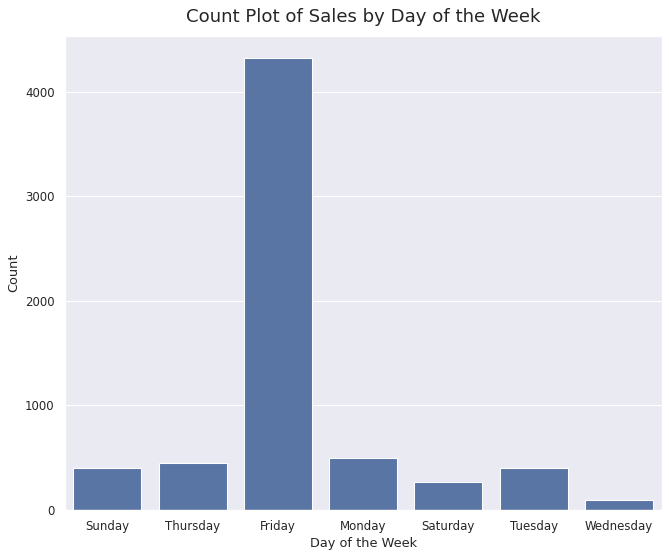

In [ ]:
#Count Plot of Sales by Day of the Week:
df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
plt.figure(figsize = (10,8), dpi=77)
sns.countplot(x = df['Day of the Week'])
plt.title("Count Plot of Sales by Day of the Week", size=17, pad= 13)
plt.ylabel('Count')
plt.show()


The count plot shows the number of sales made on each day of the week. The x-axis shows the day of the week, and the y-axis shows the number of sales. The plot shows that the most sales were made on Friday, followed by Thursday and Monday. The fewest sales were made on Wednesday.

<ipython-input-30-2b7591284d78>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()


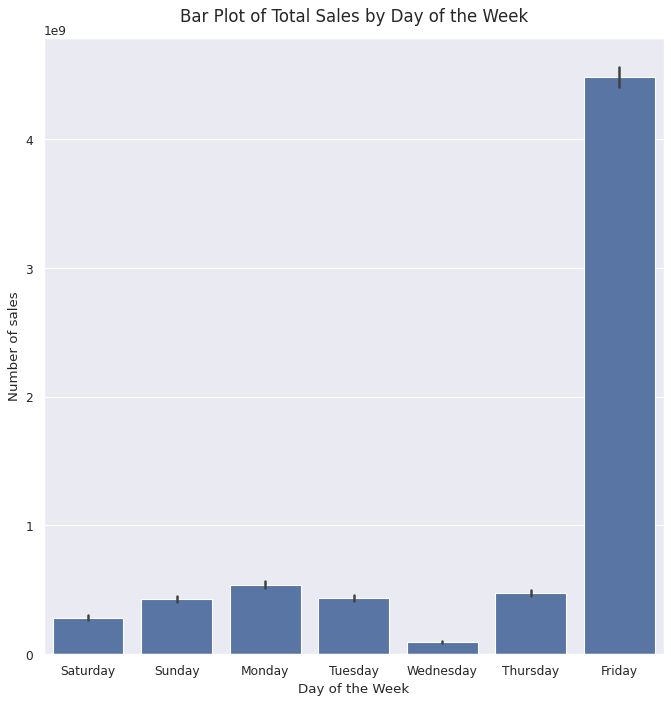

In [ ]:
#Bar Plot of Total Sales by Day of the Week:
df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df['Day of the Week'] = pd.Categorical(df['Day of the Week'], categories=order, ordered=True)

plt.figure(figsize=(10, 10), dpi=80)
sns.barplot(data=df, x="Day of the Week", y="Weekly_Sales", estimator = 'sum')
plt.title("Bar Plot of Total Sales by Day of the Week", size=15, pad=15)
plt.ylabel('Number of sales')
plt.show()

The bar chart shows the total sales for each day of the week. The x-axis shows the day of the week, and the y-axis shows the total sales in billions of dollars. The plot shows that the most sales were made on Friday, followed by Thursday and Monday.

<ipython-input-33-a1bbe6a8db94>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()


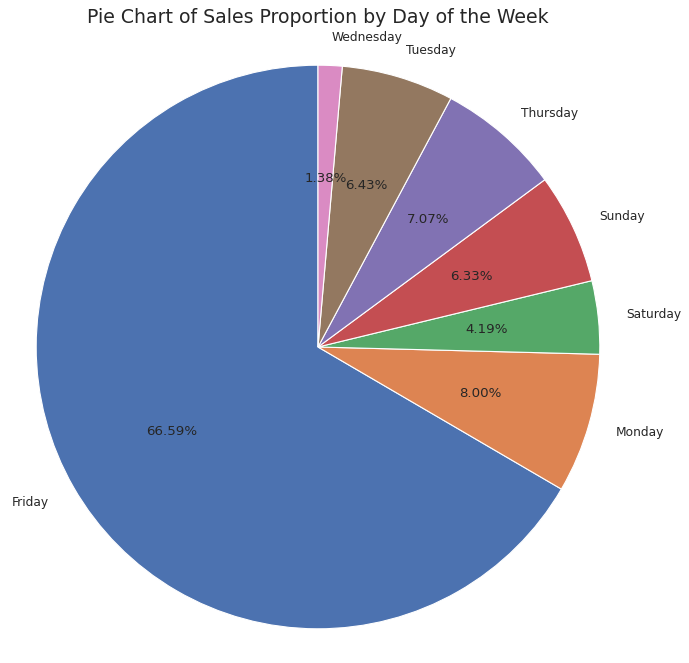

In [ ]:
#Pie Chart of Sales Proportion by Day of the Week:
df['Day of the Week'] = pd.to_datetime(df['Date']).dt.day_name()
daily_sales = df.groupby('Day of the Week')['Weekly_Sales'].sum()

plt.figure(figsize=(10,10), dpi=80)
plt.pie(daily_sales, labels=daily_sales.index, startangle=90, autopct='%2.2f%%', shadow=False)
plt.axis('equal')
plt.title("Pie Chart of Sales Proportion by Day of the Week", size=17, pad=15)
plt.show()


The pie chart shows the proportion of sales by day of the week. The largest slice of the pie chart represents Friday, which has the highest percentage of sales (66.59%). The smallest slice of the pie chart represents Wednesday, which has the lowest percentage of sales (1.38%).